# Część 2: Uczenie maszynowe

## Cel

Zadanie będzie polegało na wykonaniu modelowania predykcyjnego, którego celem jest:

- sklasyfikowanie wiadomości przesyłanych pocztą elektroniczną jako spam lub nie-spam (dane **spam.dat**),
- sklasyfikowanie transakcji wykonywanych za pomocą karty kredytowej jako fraud lub transakcja prawidłowa (dane **creditcard.csv**). 

W pierwszym przypadku wyzwanie polega na klasyfikacji w oparciu o dane wysokowymiarowe, natomiast w drugim – w oparciu o dane o bardzo różniącej się liczności klas w danych uczących (*class-imbalanced data*). 


## Dane

- spam.dat
- creditcard.csv

## Zadanie

Zadanie wyjaśnimy na przykładzie klasyfikacji wiadomości pocztowych. Zmienna celu (target) przyjmuje wartość 'yes' dla wiadomości spam lub 'no' dla dobrego listu. Atrybuty wiadomości pocztowych użyte do klasyfikacji wiadomości są oparte na projekcie SpamAssassin. 

Zbudowany klasyfikator powinien unikać klasyfikowania listów dobrych jako spam. Stąd jako kryteria jakości (akceptowalności) klasyfikatora przyjmujemy:
* minimalizację stopy błędów 'yes' $ \rightarrow $ 'no' (FNR)
* przy zapewnieniu stopy błędów 'no' $ \rightarrow $ 'yes' (FPR) poniżej 0.5%

Zadanie polega na próbie dostrojenia klasyfikatora. Należy w tym celu wykonać serię eksperymentów (*sensitivity studies*) w celu zbadania jak na skuteczność klasyfikacji wpływa: 

**1. Algorytm klasyfikatora** (sprawdź np. drzewo decyzyjne, las losowy, MLP, SVM, regresję logistyczną, kNN, naiwnego Bayesa, ...).

**2. Parametry klasyfikatora** decydujące o jego złożoności (capacity) - tu np. możemy zbadać złożoność sieci MLP, parameter C (koszt) w modelu SVM, wysokość drzewa decyzyjnego, itp. 

**3. Wybór zmiennych** / redukcja wymiarowości danych (*feature selection*) - tu badamy np. następujące metody:
- metody multivariate (np. RFE),
- metody feature selection realizowane przez regresję logistyczną (np. forward, backward),
- PCA (klasyfikacja w oparciu o pierwsze komponenty główne).
  
    
**4. Metody dla problemów class-imbalanced**  
- równoważenie liczności próbek należących do poszczególnych klas (*over / under-sampling*). Uwaga: równoważymy tylko dane treningowe, dane testowe powinny zachowywać oryginalne proporcje klas.  
- wykorzystanie algorytmu Smote.

**5. Zastosowanie niesymetrycznych kosztów błędów** 'yes' $ \rightarrow $ 'no' i 'no' $ \rightarrow $ 'yes' w trakcie uczenia klasyfikatora (np. zwiększanie kary za błąd 'yes' $ \rightarrow $ 'no' powinno poprawić czułość wykrywania spamu kosztem specyficzności, i vice versa).

**6. Składanie modeli** (*ensamble learning*) - np. algorytm AdaBoost. 


UWAGA: Dla każdego z badań raportujemy czułość i specyficzność modelu (macierz błędów), ew. FNR i FPR.

<font color=red>
Raport powinien zawierać wyniki badań 1 do 6 dla *wybranego* zbioru danych - raport w formie notebooka (.ipynb) i dokumentu (.pdf) umieszczamy na e-portalu. 
Raport może też być oddany w formie dokumentu (.pdf) i źródeł (program w Pythonie).
</font>

***

# Jak zacząć projekt 

## Przykład 1: Spam data

## Dane wejściowe - wczytanie i analiza

In [1]:
import pandas as pd

dataframe = pd.read_csv("./data/spam.dat")
dataframe.head(5)

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes


### Rozmiar danych wejściowych i podstawowe statystyki 

In [2]:
dataframe.shape

(4789, 463)

### Wartości odstające?

In [3]:
dataframe.describe()

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_AUTH_WARNING,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME
count,4789.000000,4789.0,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,...,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,0.008144,0.0,0.006056,0.000209,0.006682,0.000626,0.005638,0.007308,0.001879,0.002088,...,0.315097,0.001044,0.000626,0.012946,0.009397,0.000418,0.019420,0.000835,0.001253,0.000626
std,0.089883,0.0,0.077590,0.014450,0.081478,0.025023,0.074882,0.085185,0.043315,0.045653,...,0.464603,0.032298,0.025023,0.113055,0.096489,0.020434,0.138009,0.028892,0.035377,0.025023
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# dataframe.info()

### Czy dane zbalansowane?

In [5]:
dataframe['target'].value_counts()

no     2949
yes    1840
Name: target, dtype: int64

***
## Badamy skuteczność wybranych modeli 

Uwaga - przed uczeniem modeli często wykonujemy standaryzację danych (w wyniku średnie $ \approx $ 0, std $ \approx $ 1).
Możemy tu użyć np. StandardScaler z biblioteki sklearn.

Tu przykład bez standaryzacji.

### Podział na treningowe i testowe

In [6]:
from sklearn.model_selection import train_test_split

X = dataframe.drop(['target'],axis=1)
y = dataframe.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=331, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))  # rows

train rows: 3208, test rows: 1581


## Drzewo decyzyjne


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.9778621125869703

### Confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[926,  12],
       [ 23, 620]])

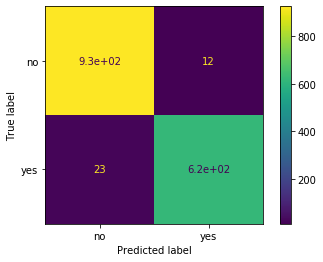

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt, X_test, y_test)  
plt.show()

In [10]:
#from sklearn.metrics import classification_report

#print(classification_report(y_test, y_pred))

### Wizualizujemy drzewo

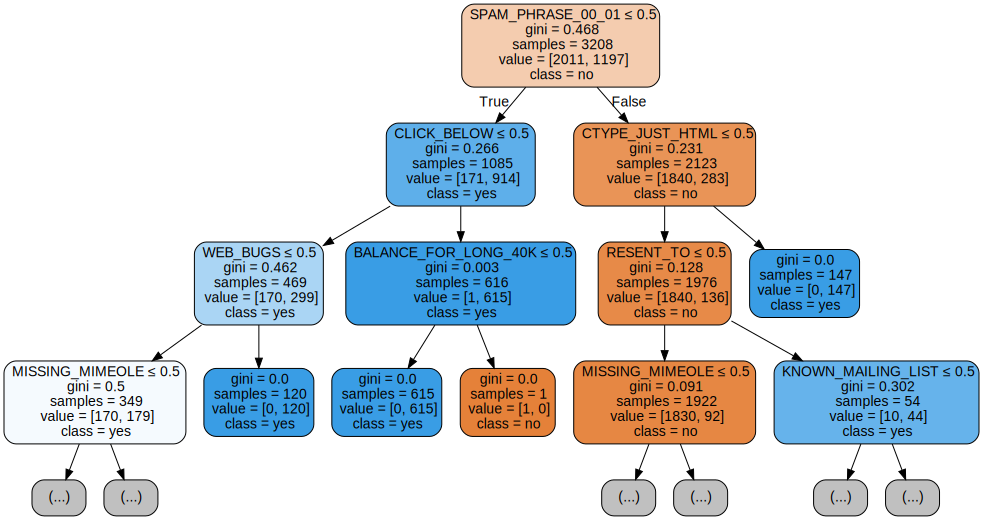

In [11]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, max_depth=3, 
                                feature_names=X_train.columns, class_names=sorted(y_train.unique()),  
                                filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 
graph

***
## Przykład 2: Credit card data 

Opis tego zbioru - patrz creditcard-data-readme.txt


To są dane bardzo niezbalansowane

In [12]:
dataframe = pd.read_csv("./data/creditcard.csv")
dataframe.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
dataframe.shape

(284807, 31)

### Class-imbalance -- nieliczne transakcje *fraud*

In [14]:
dataframe['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### W efekcie niska czułość klasyfikatora -- pokażemy to na przykładzie drzewa

In [15]:
X = dataframe.drop(['Class'],axis=1)
y = dataframe.Class

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=331, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))  # rows

train rows: 190820, test rows: 93987


In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.9991913775309351

In [17]:
confusion_matrix(y_test, y_pred, labels=[1,0])


array([[  117,    40],
       [   36, 93794]])

In [18]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
(tp, fn, fp, tn)

(117, 40, 36, 93794)

In [19]:
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)

print("sensitivity = {:.4f}, specificity = {:.4f}".format(sensitivity, specificity))

sensitivity = 0.7452, specificity = 0.9996


### Wniosek / obserwacja:
1. niska czułość modelu
2. równocześnie wartość accuracy - bardzo wysoka!

W ramach projektu należy spróbować poprawić czułość modelu (do założonego poziomu czułości), tak żeby w najmniejszym stopniu pogorszyć specyficzność - w tym celu stosujemy techniki 1-6. 

***

## Sugerowane narzędzia

### Narzędzia biblioteki scikit-learn 

http://scikit-learn.org/stable/index.html

http://scikit-learn.org/stable/user_guide.html


Polecam wykorzystanie w tym projekcie dystrybucji Anaconda. 


### Algorytmy klasyfikacji (to tylko kilka przykładów)


from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier


### Metody dla danych niezbalansowanych (class-imbalanced data)


imbalanced-learn Python library:
import imblearn

również: https://github.com/scikit-learn-contrib/imbalanced-learn

tu m.in. algorytm smote


### Redukcja wymiaru / PCA


from sklearn.decomposition import PCA
sklearn.feature_selection


### Ocena jakości klasyfikatora


from sklearn.metrics import confusion_matrix

tu wiele innych metryk - np. ROC curve


### Sugerowane środowisko wykonania badań:

jupyter lab  
(lepsza wersja jupyter notebooka)

Google Colab
